In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# import the data_set
# is_reverted: if the revision is reverted, a proxy to ground truth
# is_reverting: if the the revision is itself a revert of another revision
# damaging_prob, goodfaith_prob: predictions of ORES
df = pd.read_csv('data/data_sample.csv')
df.head()

,rev_id,auto_labeled,damaging,goodfaith,rev_link,username,anonymous,first_edit_time,edit_years,label_damage,confidence_damage,label_faith,confidence_faith
0,633643021,False,True,True,https://en.wikipedia.org/w/index.php?oldid=633...,88.119.144.62,True,"09:41, 10 March 2014",6.0,True,0.965807,False,0.256068
1,637329379,False,True,True,https://en.wikipedia.org/w/index.php?oldid=637...,5.103.14.10,True,"15:20, 9 December 2014",6.0,True,0.740493,True,0.679049
2,637571720,False,True,True,https://en.wikipedia.org/w/index.php?oldid=637...,72.80.141.196,True,"03:17, 11 December 2014",6.0,True,0.849060,True,0.525867
3,607528419,False,True,False,https://en.wikipedia.org/w/index.php?oldid=607...,176.25.59.160,True,"20:02, 7 May 2014",6.0,True,0.875999,False,0.151921
4,614798594,False,True,True,https://en.wikipedia.org/w/index.php?oldid=614...,Historyexpert2050,False,"16:09, 25 June 2014",6.0,True,0.737783,True,0.699908


In [4]:
len(df[df['damaging'] == 1])

202

In [16]:
len(df)

385

In [4]:
# remove the revert revisions
df = df[df['is_reverting'] == 0]
len(df)

893373

In [5]:
# remove prob < 0
df = df[df['damaging_prob'] >= 0]
df = df[df['goodfaith_prob'] >= 0]
len(df)

888713

In [6]:
# change all probs to 1/0 classes
df['damaging'] = df['damaging_prob'].apply(lambda x: 1 if x>=0.5 else 0)
df['goodfaith'] = df['goodfaith_prob'].apply(lambda x: 1 if x>=0.5 else 0)
df.head()

,page_id,rev_id,rev_timestamp,is_reverted,is_reverting,damaging_prob,goodfaith_prob,damaging,goodfaith
0,52232058,831517149,1521608836,0,0,0.340084,0.746885,0,1
1,1501758,841712258,1526588824,0,0,0.021781,0.984908,0,1
2,25239,844335926,1528115396,0,0,0.068573,0.941672,0,1
3,46695824,846301278,1529286250,0,0,0.021797,0.978803,0,1
4,1664084,838201915,1524687382,0,0,0.029711,0.988456,0,1


In [7]:
df.describe()

,page_id,rev_id,rev_timestamp,is_reverted,is_reverting,damaging_prob,goodfaith_prob,damaging,goodfaith
count,8.887130e+05,8.887130e+05,8.887130e+05,888713.000000,888713.0,888713.000000,888713.000000,888713.000000,888713.000000
mean,2.446147e+07,8.479707e+08,1.530552e+09,0.144771,0.0,0.166560,0.888481,0.111962,0.934872
std,2.312722e+07,1.645807e+07,9.036358e+06,0.351870,0.0,0.230924,0.190824,0.315320,0.246752
min,1.200000e+01,8.180103e+08,1.514786e+09,0.000000,0.0,0.001699,0.013195,0.000000,0.000000
25%,1.235065e+06,8.338885e+08,1.522724e+09,0.000000,0.0,0.014627,0.881952,0.000000,1.000000
50%,1.803648e+07,8.482862e+08,1.530422e+09,0.000000,0.0,0.046842,0.975779,0.000000,1.000000
75%,5.064579e+07,8.620173e+08,1.538431e+09,0.000000,0.0,0.238701,0.991277,0.000000,1.000000
max,6.266670e+07,9.176938e+08,1.546322e+09,1.000000,0.0,0.989421,0.999022,1.000000,1.000000


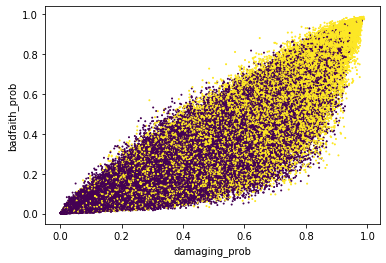

In [8]:
# Display a plot of damaging_prob vs. badfaith_prob colored with is_reverted
plt.scatter(df['damaging_prob'], (1-df['goodfaith_prob']), c=df['is_reverted'], s=1, label=df['is_reverted'])
plt.xlabel('damaging_prob')
plt.ylabel('badfaith_prob')
plt.show()

In [9]:
# check how many is_reverted/not_reverted
print(len(df))
print(len(df[df["is_reverted"] == 1]), len(df[df["is_reverted"] == 1])/len(df))
print(len(df[df["is_reverted"] == 0]), len(df[df["is_reverted"] == 0])/len(df))

888713
128660 0.14477114659063162
760053 0.8552288534093684


In [10]:
# check if any badfaith is not damaging
print(len(df[(df["goodfaith"] == 0) & (df["damaging"] == 0)]), len(df[(df["goodfaith"] == 0) & (df["damaging"] == 0)])/len(df))

527 0.0005929923383589528


In [5]:
# subset the data to 4000 and balance damaging/non-damaging labels (2500 each)
# TODO: retrieve all the training features before sampling and balance the sensitive features too

df_reverted = df[df['damaging'] == 1]
df_not_reverted = df[df['damaging'] == 0]

df_reverted_sample = df_reverted.sample(n=200, replace=False, random_state=42)
df_not_reverted_sample = df_not_reverted.sample(n=200, replace=False, random_state=42)

In [6]:
# create a new test set
df_test = pd.concat([df_reverted_sample, df_not_reverted_sample], ignore_index=True)
len(df_test)

400

In [17]:
df.to_csv("data_sample.csv", index=False)

In [14]:
# add all training features with scrape_features.py

In [40]:
df2 = pd.read_csv('ORES_test_data.csv')
df2 = df2.dropna()
print(len(df2))
df2.head()

5000


,rev_id,is_reverted,damaging_prob,goodfaith_prob,damaging,goodfaith,feature.english.badwords.revision.diff.match_delta_decrease,feature.english.badwords.revision.diff.match_delta_increase,feature.english.badwords.revision.diff.match_delta_sum,feature.english.badwords.revision.diff.match_prop_delta_decrease,...,feature.wikitext.revision.parent.headings,feature.wikitext.revision.parent.ref_tags,feature.wikitext.revision.parent.tags,feature.wikitext.revision.parent.templates,feature.wikitext.revision.parent.wikilinks,feature.wikitext.revision.ref_tags,feature.wikitext.revision.tags,feature.wikitext.revision.templates,feature.wikitext.revision.wikilinks,user.type
0,823980870,1,0.908827,0.201508,1,0,0,0,0,0.0,...,18,106,240,213,311,106,240,213,311,anonymous
1,869086806,1,0.030097,0.983296,0,1,0,0,0,0.0,...,11,95,266,114,147,95,266,114,147,experienced
2,825257062,1,0.601721,0.726833,1,1,0,0,0,0.0,...,4,35,43,146,125,35,43,146,125,anonymous
3,847284997,1,0.536357,0.569801,1,1,0,0,0,0.0,...,39,536,726,543,698,536,726,543,697,anonymous
4,823294889,1,0.806693,0.353678,1,0,0,0,0,0.0,...,18,143,446,42,298,143,446,42,298,newcomers


In [56]:
# Combine anon and new to a 3-category new feature, anonymous, newcomers, experienced
# code them to 0, 1, 2, since we are using a tree based classifier shouldn't matter
# median_seconds = 3.637819e+06

# conditions = [
#     (df2['feature.revision.user.is_anon'] == True),
#     (df2['feature.revision.user.is_anon'] == False) & (df2['feature.temporal.revision.user.seconds_since_registration'] < median_seconds),
#     (df2['feature.revision.user.is_anon'] == False) & (df2['feature.temporal.revision.user.seconds_since_registration'] >= median_seconds)]
# choices = [0, 1, 2]
# df2['user.type'] = np.select(conditions, choices)
# df2.head()

In [23]:
# remeber we sampled the data to have equal amount of is/not_reverted
df2['is_reverted'].describe()

count    5000.00000
mean        0.50000
std         0.50005
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: is_reverted, dtype: float64

In [26]:
# 2307 many anonymous users
# 73% of anonymous users' edits are reverted
# noticed that in the ORES training data 3474 out of 19319 are anonymous, 18%
df2[df2['user.type'] == 'anonymous']['is_reverted'].describe()

count    2307.000000
mean        0.730386
std         0.443856
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: is_reverted, dtype: float64

In [27]:
# 474 many newcoming users
# 70% of newcoming users' edits are reverted
df2[df2['user.type'] == 'newcomers']['is_reverted'].describe()

count    474.000000
mean       0.698312
std        0.459475
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: is_reverted, dtype: float64

In [28]:
# 2219 many experienced users
# 22% of experienced users' edits are reverted
df2[df2['user.type'] == 'experienced']['is_reverted'].describe()

count    2219.000000
mean        0.218116
std         0.413060
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: is_reverted, dtype: float64

In [34]:
# delete the two features
df2 = df2.drop(['page_id', 'rev_timestamp', 'is_reverting']
            , axis=1)



In [35]:
df2.to_csv("ORES_test_data.csv", index=False)

In [49]:
df2.shape

(5000, 83)

In [52]:
df2 = pd.read_csv('ORES_test_data.csv')

In [53]:
df2.head()

,rev_id,is_reverted,damaging_prob,goodfaith_prob,damaging,goodfaith,feature.english.badwords.revision.diff.match_delta_decrease,feature.english.badwords.revision.diff.match_delta_increase,feature.english.badwords.revision.diff.match_delta_sum,feature.english.badwords.revision.diff.match_prop_delta_decrease,...,feature.wikitext.revision.parent.headings,feature.wikitext.revision.parent.ref_tags,feature.wikitext.revision.parent.tags,feature.wikitext.revision.parent.templates,feature.wikitext.revision.parent.wikilinks,feature.wikitext.revision.ref_tags,feature.wikitext.revision.tags,feature.wikitext.revision.templates,feature.wikitext.revision.wikilinks,user.type
0,823980870,1,0.908827,0.201508,1,0,0,0,0,0.0,...,18,106,240,213,311,106,240,213,311,anonymous
1,869086806,1,0.030097,0.983296,0,1,0,0,0,0.0,...,11,95,266,114,147,95,266,114,147,experienced
2,825257062,1,0.601721,0.726833,1,1,0,0,0,0.0,...,4,35,43,146,125,35,43,146,125,anonymous
3,847284997,1,0.536357,0.569801,1,1,0,0,0,0.0,...,39,536,726,543,698,536,726,543,697,anonymous
4,823294889,1,0.806693,0.353678,1,0,0,0,0,0.0,...,18,143,446,42,298,143,446,42,298,newcomers


In [54]:
conditions = [
    (df2['user.type'] == 'anonymous'),
    (df2['user.type'] == 'newcomers'),
    (df2['user.type'] == 'experienced')]
choices = [0, 1, 2]
df2['user.type'] = np.select(conditions, choices)
df2.head()

,rev_id,is_reverted,damaging_prob,goodfaith_prob,damaging,goodfaith,feature.english.badwords.revision.diff.match_delta_decrease,feature.english.badwords.revision.diff.match_delta_increase,feature.english.badwords.revision.diff.match_delta_sum,feature.english.badwords.revision.diff.match_prop_delta_decrease,...,feature.wikitext.revision.parent.headings,feature.wikitext.revision.parent.ref_tags,feature.wikitext.revision.parent.tags,feature.wikitext.revision.parent.templates,feature.wikitext.revision.parent.wikilinks,feature.wikitext.revision.ref_tags,feature.wikitext.revision.tags,feature.wikitext.revision.templates,feature.wikitext.revision.wikilinks,user.type
0,823980870,1,0.908827,0.201508,1,0,0,0,0,0.0,...,18,106,240,213,311,106,240,213,311,0
1,869086806,1,0.030097,0.983296,0,1,0,0,0,0.0,...,11,95,266,114,147,95,266,114,147,2
2,825257062,1,0.601721,0.726833,1,1,0,0,0,0.0,...,4,35,43,146,125,35,43,146,125,0
3,847284997,1,0.536357,0.569801,1,1,0,0,0,0.0,...,39,536,726,543,698,536,726,543,697,0
4,823294889,1,0.806693,0.353678,1,0,0,0,0,0.0,...,18,143,446,42,298,143,446,42,298,1


In [55]:
df2.to_csv("ORES_test_data.csv", index=False)